In [2]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
sys.path.append("FixedStrides")
from main import *
# results_au = pd.read_csv('ipResults_home_gtx980_australia.csv', sep=';')
results_au_32bit = pd.read_csv('ip_32bit_au.csv', sep=';')
results_tokyo = pd.read_csv('ip_32bit_tokyo.csv', sep=';')
results_au_32bit.drop(results_au_32bit.columns[len(results_au_32bit.columns)-1], axis=1, inplace=True)  # delete NaN column
results_tokyo.drop(results_tokyo.columns[len(results_tokyo.columns)-1], axis=1, inplace=True)  # delete NaN column

In [3]:
def plot_prefix_distribution(prefixes):
    lengths = []
    for p in prefixes:
        len_p = len(p)
        if len_p > len(lengths):
            lengths.extend([0] * (len_p - len(lengths)))
        lengths[len_p - 1] += 1
    plt.bar(range(1, len(lengths) + 1), lengths, align='center')
    plt.xlabel('Prefix length in bits')
    plt.ylabel('Num occurrences')
    plt.title('Prefix length distribution')
    plt.show()

In [4]:
prefixes_tokyo = utils.get_prefixes_from_file(file_name='FixedStrides/data/data-raw-table_tokyo_012016.txt')
prefixes_au = utils.get_prefixes_from_file(file_name='FixedStrides/data/data-raw-table_australia_012016.txt')

Read 576846 prefixes from file in 8.958632230758667 seconds
Read 565949 prefixes from file in 8.743560791015625 seconds


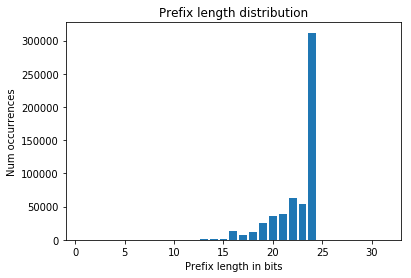

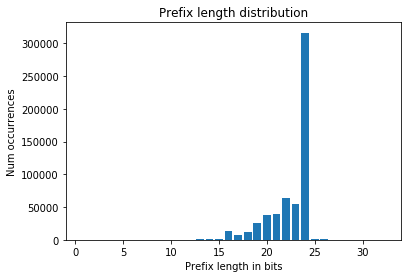

In [5]:
plot_prefix_distribution(prefixes_au)
plot_prefix_distribution(prefixes_tokyo)

In [6]:
strides_tokyo, nodes_tokyo = algos.fixed_strides_2(prefixes_tokyo)

In [7]:
strides_au, nodes_au = algos.fixed_strides_2(prefixes_au)

In [8]:
def append_stats(row: pd.Series, nodes: list):
    strides = row['Config'].replace('{', ' ').replace('}',' ').replace(',',' ').split()
    strides = [int(x) for x in strides]
    tmp, strides_nodes, cost, percent = utils.get_stats(nodes, strides, ignore_last_level=True)
    build_and_find = float(row['Build']) + float(row['Find'])
    build_and_match = float(row['Build']) + float(row['Match'])
    match_and_find = float(row['Match']) + float(row['Find'])
    return pd.Series([cost, percent, build_and_find, build_and_match, match_and_find])
    

In [9]:
newcol_names = ['Cost', 'Percent', 'BuildAndFind', 'BuildAndMatch', 'MatchAndFind']
newcols_au = results_au_32bit.apply(lambda row: append_stats(row, nodes_au), axis=1)
newcols_tokyo = results_tokyo.apply(lambda row: append_stats(row, nodes_tokyo), axis=1)
newcols_au.columns = newcol_names
newcols_tokyo.columns = newcol_names
results_au_32bit = results_au_32bit.join(newcols_au)
results_tokyo = results_tokyo.join(newcols_tokyo)

Attempting to find cost at level: 32 when len(nodes) is:  31
Attempting to find cost at level: 33 when len(nodes) is:  31
Attempting to find cost at level: 34 when len(nodes) is:  31
Attempting to find cost at level: 35 when len(nodes) is:  31
Attempting to find cost at level: 36 when len(nodes) is:  31
Attempting to find cost at level: 37 when len(nodes) is:  31
Attempting to find cost at level: 38 when len(nodes) is:  31
Attempting to find cost at level: 39 when len(nodes) is:  31
Attempting to find cost at level: 32 when len(nodes) is:  31
Attempting to find cost at level: 33 when len(nodes) is:  31
Attempting to find cost at level: 34 when len(nodes) is:  31
Attempting to find cost at level: 35 when len(nodes) is:  31
Attempting to find cost at level: 36 when len(nodes) is:  31
Attempting to find cost at level: 37 when len(nodes) is:  31
Attempting to find cost at level: 38 when len(nodes) is:  31
Attempting to find cost at level: 39 when len(nodes) is:  31
Attempting to find cost 

In [10]:
results_au_32bit = results_au_32bit.sort_values('MatchAndFind')
results_au_32bit[['Config', 'Match', 'Find', 'MatchAndFind', 'Build', 'TreeMemoryUniqueOnly', 'Cost', 'RandomMatch', 'RandomSort', 'RandomSortedMatch']]

,Config,Match,Find,MatchAndFind,Build,TreeMemoryUniqueOnly,Cost,RandomMatch,RandomSort,RandomSortedMatch
17,"{8, 8, 15}",0.482144,0.463904,0.946048,12.043488,2372752,53760.0,0.264896,2.060192,0.235840
3,"{8, 8, 15}",0.552480,0.409728,0.962208,11.815392,2328196,53760.0,0.319168,2.173504,0.303712
18,"{8, 8, 8, 7}",0.511840,0.508992,1.020832,14.148288,3736952,5435648.0,0.290880,2.865600,0.243808
4,"{8, 8, 8, 7}",0.572352,0.465376,1.037728,14.036640,3029404,5435648.0,0.316192,2.749184,0.291008
5,"{8, 8, 4, 4, 7}",0.608544,0.520160,1.128704,16.333408,2975972,1940720.0,0.324800,3.396576,0.303904
19,"{8, 8, 4, 4, 7}",0.559808,0.596512,1.156320,16.882433,3131256,1940720.0,0.291488,3.487072,0.254688
8,"{4, 4, 4, 4, 8, 7}",0.566048,0.670016,1.236064,17.734207,2988228,5429088.0,0.377024,4.045280,0.280896
6,"{8, 8, 4, 2, 2, 7}",0.650656,0.602496,1.253152,19.235968,3365028,1400844.0,0.375520,4.347616,0.343712
20,"{8, 8, 4, 2, 2, 7}",0.629856,0.659680,1.289536,18.833183,3501088,1400844.0,0.313376,4.101312,0.319712
7,"{8, 8, 2, 2, 2, 2, 7}",0.680032,0.632896,1.312928,19.825920,3385564,1356796.0,0.335008,4.632384,0.319552


In [11]:
results_tokyo = results_tokyo.sort_values('MatchAndFind')
results_tokyo[['Config', 'Match', 'Find', 'MatchAndFind', 'Build', 'TreeMemoryUniqueOnly', 'Cost', 'RandomMatch', 'RandomSort', 'RandomSortedMatch']]

,Config,Match,Find,MatchAndFind,Build,TreeMemoryUniqueOnly,Cost,RandomMatch,RandomSort,RandomSortedMatch
24,"{1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...",1.474528,7.595040,9.069568,51.406879,3554832,1634482.0,1.126784,16.246912,0.696512
23,"{3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",1.698208,8.090592,9.788800,62.388832,3550600,1635544.0,0.684480,19.185568,0.489376
25,"{1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2.016832,8.553632,10.570464,72.545952,3551560,1635648.0,0.758048,22.430624,0.530656
32,"{3, 5, 4, 4, 2, 2, 2, 2, 8, 1, 1, 1, 1, 1, 1, ...",8.488768,15.787040,24.275808,36.119072,2324088,1636316.0,8.684064,13.088736,8.136032
9,"{14, 2, 2, 2, 2, 2, 8}",1.031616,25.086847,26.118463,21.734688,3003792,1388436.0,4.621920,5.471712,4.349888
14,"{7, 7, 2, 2, 2, 2, 2, 8}",1.028672,25.194208,26.222880,24.047873,2958568,1386388.0,3.804384,5.661504,1.282816
8,"{16, 2, 2, 2, 2, 8}",0.898368,26.305952,27.204320,20.456160,3190592,1400628.0,31.801184,4.455936,31.439327
26,"{2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2}",1.441152,26.092480,27.533632,39.224415,2983304,1392816.0,0.533920,11.248928,0.384320
20,"{8, 8, 2, 2, 2, 2, 8}",1.033248,26.570047,27.603295,21.902143,2971824,1388596.0,8.222624,5.220736,8.153120
31,"{3, 5, 4, 4, 2, 2, 2, 2, 8}",1.030592,26.892223,27.922815,24.815136,2944592,1382364.0,0.657280,6.549120,0.572160


In [12]:
results_au_32bit = results_au_32bit.sort_values('TreeMemoryUniqueOnly')
results_au_32bit[['Config', 'TreeMemoryUniqueOnly', 'Cost', 'Percent', 'TreeLevels', 'ChildrenMemory', 'ChildrenCountsMemory', 'ScanMemory', 'PreScanMemory', 'PermuationMemory', 'LengthsMemory', 'MasksPartsMemory', 'ContainerSumMemory', 'ContainerItemsMemory', 'ContainerStartsMemory', 'ContainerLengthsMemory']]

,Config,TreeMemoryUniqueOnly,Cost,Percent,TreeLevels,ChildrenMemory,ChildrenCountsMemory,ScanMemory,PreScanMemory,PermuationMemory,LengthsMemory,MasksPartsMemory,ContainerSumMemory,ContainerItemsMemory,ContainerStartsMemory,ContainerLengthsMemory
126,"{3, 5, 4, 4, 2, 2, 2, 2, 8, 1, 1, 1, 1, 1, 1, ...",2274564,1375572.0,86.139283,"{1,1,1,1,40,56,99,158,194,}",6000,36,72,72,2263796,2263796,2263796,2268384,2263796,2312,2276
60,"{3, 5, 4, 4, 2, 2, 2, 2, 8, 1, 1, 1, 1, 1, 1, ...",2274564,1375572.0,86.139283,"{1,1,1,1,40,56,99,158,194,}",6000,36,72,72,2263796,2263796,2263796,2268384,2263796,2312,2276
110,"{8, 8, 16}",2309620,53760.0,3.366489,"{1,40,425,}",42000,12,12,12,2263796,2263796,2263796,2267584,2263796,1900,1888
44,"{8, 8, 16}",2309620,53760.0,3.366489,"{1,40,425,}",42000,12,12,12,2263796,2263796,2263796,2267584,2263796,1900,1888
93,"{3, 5, 4, 4, 2, 2, 2, 2, 8, 1, 1, 1, 1, 1, 1, ...",2324088,1375572.0,86.139283,"{1,1,1,1,36,52,107,260,630,}",7632,36,72,72,2307384,2307384,2307384,2316276,2307384,4464,4428
3,"{8, 8, 15}",2328196,53760.0,3.366489,"{1,56,683,}",58384,12,12,12,2263796,2263796,2263796,2269776,2263796,2996,2984
77,"{8, 8, 16}",2358400,53760.0,3.366489,"{1,41,945,}",43024,12,12,12,2307384,2307384,2307384,2315340,2307384,3984,3972
17,"{8, 8, 15}",2372752,53760.0,3.366489,"{1,52,1320,}",54288,12,12,12,2307384,2307384,2307384,2318428,2307384,5528,5516
30,"{16, 16}",2529420,65536.0,4.103910,"{1,425,}",262152,8,8,8,2263796,2263796,2263796,2267244,2263796,1728,1720
96,"{16, 16}",2529420,65536.0,4.103910,"{1,425,}",262152,8,8,8,2263796,2263796,2263796,2267244,2263796,1728,1720


In [13]:
results_tokyo = results_tokyo.sort_values('Match')
results_tokyo[['Config', 'Match', 'Find', 'MatchAndFind', 'Build', 'TreeMemoryUniqueOnly', 'Cost', 'Percent', 'ChildrenMemory', 'ContainerStartsMemory', 'ContainerLengthsMemory']]

,Config,Match,Find,MatchAndFind,Build,TreeMemoryUniqueOnly,Cost,Percent,ChildrenMemory,ContainerStartsMemory,ContainerLengthsMemory
8,"{16, 2, 2, 2, 2, 8}",0.898368,26.305952,27.204320,20.456160,3190592,1400628.0,85.631383,667752,107704,107680
5,"{16, 4, 2, 2, 8}",0.900832,34.172127,35.072959,18.144735,3189568,1444460.0,88.311177,682208,99968,99948
19,"{8, 8, 4, 2, 2, 8}",0.963584,34.388351,35.351935,19.827328,2970800,1432428.0,87.575566,463080,100144,100120
15,"{7, 7, 4, 4, 2, 8}",0.971648,32.870880,33.842528,19.171743,2926160,1653940.0,101.118334,447944,85392,85368
14,"{7, 7, 2, 2, 2, 2, 2, 8}",1.028672,25.194208,26.222880,24.047873,2958568,1386388.0,84.760780,432104,109508,109476
31,"{3, 5, 4, 4, 2, 2, 2, 2, 8}",1.030592,26.892223,27.922815,24.815136,2944592,1382364.0,84.514761,419936,108600,108564
9,"{14, 2, 2, 2, 2, 2, 8}",1.031616,25.086847,26.118463,21.734688,3003792,1388436.0,84.885990,477664,109344,109316
20,"{8, 8, 2, 2, 2, 2, 8}",1.033248,26.570047,27.603295,21.902143,2971824,1388596.0,84.895772,448624,107880,107852
29,"{1, 16, 2, 2, 2, 1, 8}",1.054816,33.480927,34.535743,22.553120,3709104,1506516.0,92.105147,1010704,195480,195452
30,"{1, 16, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1}",1.077952,34.131233,35.209185,35.215073,3747928,1511024.0,92.380757,1036184,202124,202068


In [14]:
results_au_32bit['TreeMemoryUniqueOnly'].corr(results_au_32bit['Match'])

0.7564542216793206

In [15]:
results_au_32bit['TreeMemoryUniqueOnly'].corr(results_au_32bit['Find'])

0.9924598063897121

In [16]:
results_au_32bit['TreeMemoryUniqueOnly'].corr(results_au_32bit['Build'])

0.00029850015980321953

In [17]:
results_tokyo['ChildrenMemory'].corr(results_au_32bit['Cost'])

-0.023197383198958792

In [18]:
results_au_32bit['ChildrenMemory'].corr(results_au_32bit['Cost'])

0.69732591602041

In [19]:
results_au_32bit['Match'].corr(results_au_32bit['Cost'])

0.634890126881003

In [20]:
results_tokyo['Match'].corr(results_au_32bit['Cost'])

-0.01696349874535385

In [21]:
results_tokyo.columns

Index(['deviceId', 'deviceName', 'Dictionary', 'Load', 'Count', 'Sort',
       'Config', 'Reshape', 'Build', 'TreeMemory', 'TreeLevels', 'Depth',
       'TreeMemoryUniqueOnly', 'ChildrenMemory', 'ChildrenCountsMemory',
       'ScanMemory', 'PreScanMemory', 'PermuationMemory', 'LengthsMemory',
       'MasksPartsMemory', 'ContainerSumMemory', 'ContainerItemsMemory',
       'ContainerStartsMemory', 'ContainerLengthsMemory', 'Find', 'Match',
       'RandomCount', 'RandomMatch', 'RandomSort', 'RandomSortedMatch',
       'HitRate', 'Cost', 'Percent', 'BuildAndFind', 'BuildAndMatch',
       'MatchAndFind'],
      dtype='object')

In [22]:
# results_tokyo[['Config', 'Build', 'Cost', 'Percent', 'TreeMemory','BuildAndFind', 'Match', 'Find', 'RandomMatch', 'RandomSortedMatch']]

In [23]:
# results_au_32bit[['Config', 'Build', 'TreeMemory', 'Match', 'Find','BuildAndFind','RandomCount', 'RandomMatch', 'RandomSort', 'RandomSortedMatch', 'HitRate', 'Cost', 'Percent']]